<img src="../images/CONFIDENTDATASCIENCE.png" alt="An image that reads Confident Data Science: The Essential Skills of Data Science, Companion Jupyter Notebook + Coding Examples. Also shows book image."/>

## Chapter 9 *Data*

To give citation to these coding examples give reference to an appropriate chapter and page of:

*Confident Data Science: Discover the essential skills of data science* <br>
(Confident Series, 15) 1st Edition by Adam Ross Nelson (Author) <br>
Publisher : Kogan Page (September 26, 2023).

## Relative Utility + Type Converstions

In [1]:
# Import the Pandas and Seaborn libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_context('talk')

# Open data from online.
df = sns.load_dataset('mpg')

# Show continuous nature of data with summaries.
df[['weight']].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
weight,398.0,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0


In [2]:
# Examine summary summaries by place of manufacture
df.groupby('origin').describe()['weight']


,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,2423.300000,490.043191,1825.0,2067.25,2240.0,2769.75,3820.0
japan,79.0,2221.227848,320.497248,1613.0,1985.00,2155.0,2412.50,2930.0
usa,249.0,3361.931727,794.792506,1800.0,2720.00,3365.0,4054.00,5140.0


<Axes: xlabel='weight', ylabel='origin'>

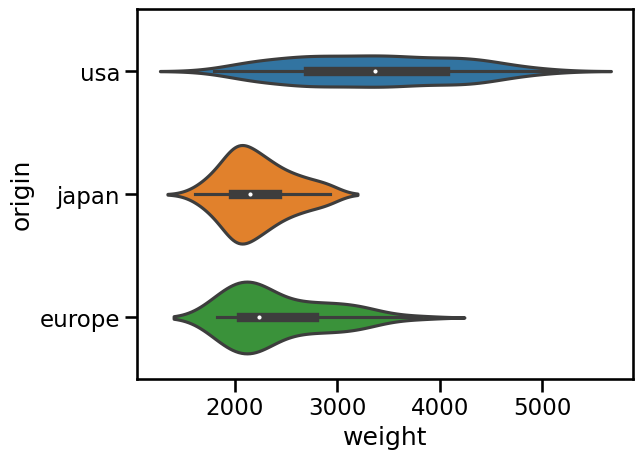

In [3]:
# Show continuous nature of data with violin plots.
sns.violinplot(data=df,
               x='weight',
               y='origin')


### Continuous To Ordinal

In [4]:
# Establish bins with pd.cut, name the bins
df['weight_cat'] = pd.cut(df['weight'], 5, 
                          labels=['Very Light','Light',
                                  'Moderate','Heavy',
                                  'Very Heavy'])

# Produce a crosstabulation that displays how weight may relate to origin
pd.crosstab(df['origin'], df['weight_cat'])


weight_cat,Very Light,Light,Moderate,Heavy,Very Heavy
origin,,,,,
europe,39,21,9,1,0
japan,53,26,0,0,0
usa,29,66,68,62,24


### Nominal To Binary

In [5]:
# Frequently used data science imports.
import pandas as pd
import seaborn as sns

# Open data from online.
df = sns.load_dataset('mpg')

# Create a nominal binary from the multi-categorical nominal original
df['origin2'] = df['origin'].map(
    {'usa':'us',
     'japan':'abroad',
     'europe':'abroad'})

# Show the results
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin2
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,us
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,us
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,us
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,us
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,us
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,us
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,abroad
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,us
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,us


In [6]:
# Use list comprehension to create nominal binary
df['origin3'] = ['us' if x == 'usa' else 
                 'abroad' for x in df['origin']]

# Use np.where() to create nominal binary from the multi-categorical nominal
df['origin4'] = np.where(
    df['origin'] == 'usa','us','abroad')


## Popular Data Sources

### FiveThirtyEight

In [7]:
# U.S. House of Representative election predictions
house = pd.read_csv('https://projects.fivethirtyeight.com/' +
                    'polls/data/house_polls_historical.csv')

# Display an excerpt of the data
house.sample(5)


,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,methodology,...,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
1473,68102,178,Global Strategy Group,NaN,NaN,Global Strategy Group,118,Global Strategy Group,B/C,Live Phone,...,11/3/20,general,False,False,NaN,REP,Zeldin,14739,Lee M. Zeldin,47.0
395,79886,383,PPP,NaN,NaN,Public Policy Polling,263,Public Policy Polling,A-,IVR/Text,...,11/8/22,general,False,False,NaN,DEM,Pfaff,30035,Brad Pfaff,40.0
426,79783,1554,RMG Research,1054,United States Term Limits,RMG Research,555,RMG Research,B-,NaN,...,11/8/22,general,False,False,NaN,REP,Peters,29745,Sam Peters,43.0
1936,56634,1102,Emerson College Polling Society,NaN,NaN,Emerson College,88,Emerson College,A-,IVR/Online Panel,...,11/6/18,general,False,False,NaN,MTP,Lutz,13239,Daniel P. Lutz,3.7
1492,69521,178,Global Strategy Group,973,314 Action,Global Strategy Group,118,Global Strategy Group,B/C,Live Phone,...,11/3/20,general,False,False,NaN,REP,Good,14657,"Robert G. ""Bob"" Good",48.0


In [8]:
# U.S. Senate election predictions
senate = pd.read_csv('https://projects.fivethirtyeight.com/' +
                     'polls/data/senate_polls_historical.csv')

# Display an excerpt of the data
senate.sample(5).transpose()


,6368,4362,4332,6245,2604
poll_id,53717,65742,66011,53664,72304
pollster_id,383,1293,1347,1193,1522
pollster,PPP,OH Predictive Insights / MBQF,Cygnal Political,SurveyMonkey,Swayable
sponsor_ids,487,NaN,1274,788,NaN
sponsors,Christian Ulvert,NaN,Georgia House Republican Trust,Axios,NaN
display_name,Public Policy Polling,OH Predictive Insights,Cygnal,SurveyMonkey,Swayable
pollster_rating_id,263.0,235.0,67.0,324.0,543.0
pollster_rating_name,Public Policy Polling,Noble Predictive Insights,Cygnal,SurveyMonkey,Swayable
fte_grade,A-,B/C,A,C,C
methodology,IVR,IVR/Live Phone,Live Phone/Text-to-Web/Email,Online Panel,Online Ad


In [9]:
# Display the columns in senate
senate.columns

Index(['poll_id', 'pollster_id', 'pollster', 'sponsor_ids', 'sponsors',
       'display_name', 'pollster_rating_id', 'pollster_rating_name',
       'fte_grade', 'methodology', 'state', 'start_date', 'end_date',
       'sponsor_candidate_id', 'sponsor_candidate', 'sponsor_candidate_party',
       'question_id', 'sample_size', 'population', 'subpopulation',
       'population_full', 'tracking', 'created_at', 'notes', 'url', 'source',
       'internal', 'partisan', 'race_id', 'cycle', 'office_type',
       'seat_number', 'seat_name', 'election_date', 'stage',
       'nationwide_batch', 'ranked_choice_reallocated', 'ranked_choice_round',
       'party', 'answer', 'candidate_id', 'candidate_name', 'pct'],
      dtype='object')

In [10]:
house['methodology'].value_counts()

Live Phone                                 1517
IVR                                         189
IVR/Online Panel                            175
Online Panel                                131
Live Phone/Text-to-Web                      115
Text-to-Web                                 112
IVR/Live Phone                              112
IVR/Text                                    108
Live Phone/Online Panel                      98
Probability Panel                            56
Online Panel/Text-to-Web                     37
IVR/Online Panel/Text-to-Web/Email           25
IVR/Text-to-Web                              25
Text-to-Web/Online Ad                        21
Email                                        20
Text                                         11
Face-to-Face                                  9
IVR/Online Panel/Text-to-Web                  8
IVR/Live Phone/Online Panel                   6
Live Phone/Text-to-Web/Email                  5
Live Phone/Text                         

In [11]:
# World Cup tournament predictions
cup = pd.read_csv('https://projects.fivethirtyeight.com/' + \
                  'soccer-api/international/2022/wc_matches.csv')

# Display an excerpt of the data
cup.sample(5)


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
13,2022-11-24,1908,FIFA World Cup,Uruguay,South Korea,80.90,66.12,0.5256,0.1906,0.2838,1.52,0.80,0,0,0.48,0.40,0.89,0.74,0.00,0.00
25,2022-11-27,1908,FIFA World Cup,Belgium,Morocco,80.54,74.67,0.4070,0.3057,0.2873,1.41,1.18,0,2,0.88,0.48,0.91,0.42,0.00,1.58
17,2022-11-25,1908,FIFA World Cup,Qatar,Senegal,48.16,73.23,0.2098,0.5228,0.2674,0.96,1.66,1,3,0.94,0.75,1.06,1.28,1.05,2.81
1,2022-11-21,1908,FIFA World Cup,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,1.70,0.58,6,2,1.04,1.45,1.50,0.32,5.78,2.10
33,2022-11-29,1908,FIFA World Cup,Ecuador,Senegal,75.82,73.00,0.3668,0.2961,0.3371,1.06,0.92,1,2,0.61,1.73,0.77,1.14,1.05,2.10


### UC Irvine Machine Learning Repository

In [12]:
# Chemical analysis of wine samples
wine = pd.read_csv('https://archive.ics.uci.edu/ml/' + \
                   'machine-learning-databases/wine/wine.data',
                   names=['Alcohol','MalicAcid','Ash','Alcalinity',
                          'Magnesium','TotPhenols','Flavanoids',
                          'NonFlavanoidPhen','Proanthocyanins','Color',
                          'Hue','OD280_OD315','Proline'])

# Display an excerpt of the data
wine.sample(5)


,Alcohol,MalicAcid,Ash,Alcalinity,Magnesium,TotPhenols,Flavanoids,NonFlavanoidPhen,Proanthocyanins,Color,Hue,OD280_OD315,Proline
3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
2,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
1,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310
1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562


### Additional Libraries

#### Seaborn

In [13]:
# Get a list of Seaborn data sets
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [14]:
# Load and display the mpg data from sns.load_dataset()
sns.load_dataset('mpg').sample(5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
203,29.5,4,97.0,71.0,1825,12.2,76,europe,volkswagen rabbit
285,17.0,8,305.0,130.0,3840,15.4,79,usa,chevrolet caprice classic
214,13.0,8,302.0,130.0,3870,15.0,76,usa,ford f108
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala


An alternate approach (though not recommended) is to load from online.

```Python
# Load and display the mpg data from Seaborn's GitHub
pd.read_csv('https://raw.githubusercontent.com/' + \
            'mwaskom/seaborn-data/master/mpg.csv').sample(5)
````

Discussed in the book are also the tips and penguines data.
```Python
# Loading the tips data
sns.load_dataset('tips')

# Loading the penguines data
sns.load_dataset('penguins')
```

#### People Analytics Data

In [15]:
# import peopleanalyticsdata package
import peopleanalyticsdata as pad
import pandas as pd

print(f'There are {len(pad.list_sets())} data sets in this library.', 
      end='\n\n')

# see a list of data sets
print(pad.list_sets())


There are 16 data sets in this library.

['charity_donation', 'employee_survey', 'health_insurance', 'job_retention', 'managers', 'politics_survey', 'salespeople', 'soccer', 'sociological_data', 'speed_dating', 'ugtests', 'employee_performance', 'learning', 'graduates', 'promotion', 'recruiting']


In [16]:
# load data into a dataframe
df = pad.managers()

df.sample(6)


,employee_id,performance_group,yrs_employed,manager_hire,test_score,group_size,concern_flag,mobile_flag,customers,high_hours_flag,transfers,reduced_schedule,city
20,0f2e5ec9,Bottom,5.0,N,189,9,N,Y,20,N,2,N,Toronto
324,0a6e155a,Middle,4.6,N,303,11,N,N,20,Y,0,Y,Houston
415,4bd699d4,Middle,4.6,N,167,12,N,N,18,N,2,N,Toronto
261,d0b458b0,Middle,4.4,N,417,17,N,N,40,Y,2,N,New York
316,f0580354,Middle,2.8,Y,212,10,N,N,16,Y,0,N,Toronto
553,a8bd794c,Middle,4.0,N,167,10,N,N,20,N,0,N,New York


## Social Media Data

In [17]:
# Specify file location, path, and name
location = 'https://raw.githubusercontent.com/'
path = 'adamrossnelson/confident/main/data/'
name = 'confident_ch9social.csv'

# Load ConfidentDataCh9Social.csv
df = pd.read_csv(location + path + name)

# Show the results
df.sample(3)


,Date,ShareCommentary,Reactions,Comments,User
58,2020-09-02,I downloaded this app. I reviewed it carefully...,12.0,1.0,1041
130,2022-08-29,It is a smart idea to explore the people your ...,4.0,316.0,1010
60,2021-07-16,ED Office of the Chief Data Officer continues ...,16.0,3.0,1040


```Python
# Optional code to convert date column to datetime64[ns]
df['Date'] = pd.to_datetime(df['Date'])
```

In [18]:
# Explore descriptive statistics
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Reactions,194.0,12.695876,17.940179,1.0,5.0,8.0,15.0,219.0
Comments,194.0,7.515464,23.817142,1.0,2.0,3.0,6.0,316.0
User,194.0,1032.809278,14.484929,1010.0,1020.0,1031.0,1050.0,1051.0


In [19]:
# Set environment variable to cope with Release 4.21.0 of protobuf
# https://github.com/protocolbuffers/protobuf/issues/10051
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"


In [20]:
# Additionally import Google cloud libraries
from google.cloud import language_v1
from google.protobuf.json_format import MessageToDict

# Specify a services.json location
sl = '../../../services/services.json'

# Check if the services file exists
import os
if not os.path.isfile(sl):
    raise FileNotFoundError(f"""NoFileError - {sl} does not exist.
        Read more at: 
        https://developers.google.com/workspace/guides/create-credentials#create_credentials_for_a_service_account""")

# Name/define the function google_api_document_scores()
def google_api_document_scores(series: pd.Series) -> pd.DataFrame:
    """Returns sentiment scores of a given text using 
    the Google Cloud API.

    Takes the text data contained within the provided 
    Pandas Series and returns a DataFrame reporting 
    sentiment scores for each item in the original 
    Series. The DataFrame will have an index that 
    matches the Series index.

    Parameters
    ----------
    series : pd.Series
        Pandas Series containing text data to be 
        analyzed by the Google Cloud API.
    
    Returns
    ----------
    doc_scores_df : pd.DataFrame
        DataFrame reporting each document's resulting 
        sentiment scores.
    """

    # Instantiate Google Cloud API's client
    client = language_v1.LanguageServiceClient.from_service_account_json(sl)

    # Define lists to contain sentence sentiments.
    index = []
    documents = []
    doc_sentiment_scores = []
    doc_magnitude_scores = []

    # Loop through each Series item; have Google 
    # Cloud API analyze sentiment scores
    for i in series.index:

        # Take the next item in the Pandas Series
        my_text = series.loc[i]  
        # Create a Google Cloud document from the text
        document = language_v1.Document(
            content=my_text, 
            type_=language_v1.Document.Type.PLAIN_TEXT)
        # Send the document to Google's API
        a_doc_sentiment = client.analyze_sentiment(
            request={'document':document}).document_sentiment

        # Extract sentment & magnitude scores for each doc
        doc_magnitude = a_doc_sentiment.magnitude
        doc_score = a_doc_sentiment.score
        
        # Append original text scores to each list
        documents.append(my_text)
        # Append the sentiment scores
        doc_sentiment_scores.append(doc_score)
        # Append the magnitude scores
        doc_magnitude_scores.append(doc_magnitude)
        # Append the index list
        index.append(i)

    # Compile results entire analysis in df
    doc_scores_df = pd.DataFrame(
        {'index':index,
         'Documents':documents,
         'Sentiment':doc_sentiment_scores,
         'Magnitude':doc_magnitude_scores}).set_index('index')

    # Return the resulting DataFrame
    return doc_scores_df


In [21]:
# Import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import NLTK's sentence tokenizer
from nltk.tokenize import sent_tokenize


# Name/define the function post_scores()
def post_scores(series: pd.Series) -> pd.DataFrame:
    '''Returns sentiment scores of a given text using 
    NLTK’s VADER sentiment analysis tools.

    Takes a Pandas Series that contains text data. 
    Returns a Pandas DataFrame that reports sentiment 
    scores for item within the Pandas Seires. The 
    DataFrame will havean index that matches the 
    Series index.
    
    Parameters
    ----------
    Series : pd.Series
        Pandas Series containing text data to be 
        analyzed using NLTK’s VADER sentiment analysis 
        tools.

    Returns
    ----------
    doc_scores_df : pd.DataFrame
        DataFrame reporting each document's resulting 
        sentiment scores.
    '''

    # Define empty lists that will contain each result.
    index = []
    posts = []
    neg_scores = []
    neu_scores = []
    pos_scores = []
    compounds = []
    
    # Instantiate the analyzer.
    sid = SentimentIntensityAnalyzer()
    
    # Loop through each item in the Series.
    for i in series.index:

        # Extract sentence scores; append lists.
        try:
            # Get sentiment scores from NLTK
            scores = sid.polarity_scores(
                series.loc[i])
            # Append the index list
            index.append(i)
            # Append the original text
            posts.append(
                series.loc[i])
            # Append the negative scores list
            neg_scores.append(
                scores['neg'])
            # Append the neutral scores list
            neu_scores.append(
                scores['neu'])
            # Append the positive scores list
            pos_scores.append(
                scores['pos'])
            # Append the positive scores list
            compounds.append(
                scores['compound'])
        
        # When there is an error, skip that entry.
        except:
            pass
    
    # Compile & return Pandas DataFrame
    return(pd.DataFrame(
        {'index':index,
         'Sentence':posts,
         'Negative':neg_scores,
         'Neutral':neu_scores,
         'Positive':pos_scores,
         'Compound':compounds}).set_index('index'))


In [22]:
# Collect sentiment data using Google API
results_google = google_api_document_scores(df['ShareCommentary'])


In [23]:
# Collect sentiment data using NLTK
results_nltk = post_scores(df['ShareCommentary'])


In [24]:
# Add identifier suffix to the columns
results_google = results_google.add_suffix('_ggl')
results_nltk = results_nltk.add_suffix('_nltk')


In [25]:
# Concatenate the results
concatenated = pd.concat([df,
                          results_google[['Sentiment_ggl',
                                          'Magnitude_ggl']],
                          results_nltk[['Negative_nltk',
                                        'Neutral_nltk',
                                        'Positive_nltk',
                                        'Compound_nltk']]], 
                          axis=1)


In [29]:
# Save the results to disk
concatenated.to_csv('../data/confident_ch9socialsents.csv', 
                    index=False)


In [27]:
# Show the results
concatenated.sample(8)


,Date,ShareCommentary,Reactions,Comments,User,Sentiment_ggl,Magnitude_ggl,Negative_nltk,Neutral_nltk,Positive_nltk,Compound_nltk
184,2019-07-26,New data on bullying from #EDNCES.,1.0,1.0,1041,-0.7,0.7,0.438,0.562,0.000,-0.5994
176,2022-09-13,"A beautiful, bright candle gone out too soon. ...",2.0,3.0,1041,0.3,0.6,0.000,0.405,0.595,0.8834
5,2022-04-09,A Saturday morning creep. On LinkedIn. Total...,38.0,60.0,1020,0.0,5.0,0.223,0.777,0.000,-0.8957
163,2021-08-12,Networking and building professional relations...,3.0,1.0,1051,0.5,2.9,0.000,0.774,0.226,0.9744
41,2021-04-29,Navigating the healthcare system can be a tota...,14.0,4.0,1051,-0.1,1.7,0.000,0.854,0.146,0.8338
24,2021-09-02,"Whatever you are doing right now….""\r\n""""\r\n""...",24.0,7.0,1011,0.2,5.8,0.000,0.771,0.229,0.9442
189,2021-05-04,Go team!,4.0,2.0,1021,0.9,0.9,0.000,1.000,0.000,0.0000
190,2020-11-17,#GoTeam,2.0,2.0,1020,0.3,0.3,0.000,1.000,0.000,0.0000


In [28]:
# Output the information on concatenated
concatenated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             194 non-null    object 
 1   ShareCommentary  194 non-null    object 
 2   Reactions        194 non-null    float64
 3   Comments         194 non-null    float64
 4   User             194 non-null    int64  
 5   Sentiment_ggl    194 non-null    float64
 6   Magnitude_ggl    194 non-null    float64
 7   Negative_nltk    194 non-null    float64
 8   Neutral_nltk     194 non-null    float64
 9   Positive_nltk    194 non-null    float64
 10  Compound_nltk    194 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 16.8+ KB


## Update + Change Log

March, 2023 - Created notebook.<br>
April, 2023 - Prepared for GitHub.<br>
October, 2023 - Updated to match book as published.